## SYMBOLIC STUDY
# Rolling Chassis Assembly
------------------------------------

## **SYSTEM DESCRIPTION**
-------------------------

---------------------------------------------------------------
---------------------------------------------------------------

In [1]:
import os
from uraeus.smbd.systems import assembly, load_pickled_data

In [2]:
database_directory = os.path.abspath('../../')

In [3]:
def get_template(name):
    file_ = os.path.join(database_directory, 'symenv/templates', name, 'data', '%s.stpl'%name)
    model = load_pickled_data(file_)
    model.assemble()
    return model

### Symbolic Templates

In [6]:
suspension = get_template('double_wishbone_bellcrank')

steering = get_template('rack_steering')

chassis = get_template('chassis')

drive_shafts = get_template('drive_shafts_v1')

## Symbolic Assembly

In [10]:
model_name = 'rolling_chassis_v1'
sym_model = assembly(model_name)

### Adding Subsystems

In [11]:
sym_model.add_subsystem('AX1', suspension)
sym_model.add_subsystem('ST1', steering)

sym_model.add_subsystem('AX2', suspension)
sym_model.add_subsystem('DR2', drive_shafts)

sym_model.add_subsystem('CH', chassis)

### Mapping Virtual Bodies

In [12]:
sym_model.assign_virtual_body('AX1.vbs_chassis', 'CH.rbs_chassis')
sym_model.assign_virtual_body('AX2.vbs_chassis', 'CH.rbs_chassis')
sym_model.assign_virtual_body('ST1.vbs_chassis', 'CH.rbs_chassis')

sym_model.assign_virtual_body('DR2.vbs_differential', 'CH.rbs_chassis')
sym_model.assign_virtual_body('DR2.vbr_wheel_hub', 'AX2.rbr_hub')

sym_model.assign_virtual_body('AX1.vbr_steer', 'ST1.rbs_rack')
sym_model.assign_virtual_body('AX2.vbr_steer', 'CH.rbs_chassis')

### Assembling

In [13]:
sym_model.assemble()

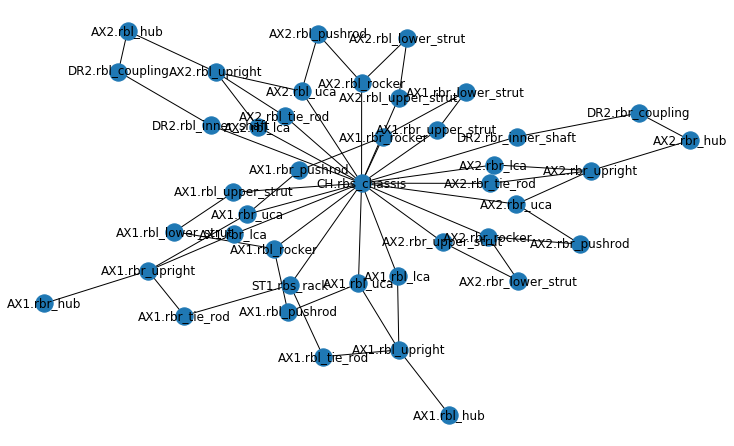

In [15]:
sym_model.draw_constraints_topology()

---------------------------------------------------------------
---------------------------------------------------------------

In [16]:
from uraeus.smbd.utilities.serialization.structural.json import assembly_encoder

In [17]:
jsonfied = assembly_encoder.generator(sym_model.topology)
jsonfied.write_JSON_file('configurations')

---------------------------------------------------------------
---------------------------------------------------------------